<a href="https://colab.research.google.com/github/Sbastian-Rai/Olyst-Marketplace-Analysist/blob/main/Olist_Marketplace_Analysis%5BProject%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olyst Marketplace Analysis

***Projet data wrangling dan SQL oleh M Sbastian Rai***

Project ini merupakan bagian dari project siswa kelas Data Analisis Pacmann Academy.

Dalam project ini, analisis data dilakukan terhadap database (.db) dari Olyst Marketplace.

Analisis data dibatasi melalui tujuan-tujuan berikut:

Objectives:

1.   Mengetahui kategori produk dengan pemesanan terbesar dan terkecil
2.   Mengetahui pendapatan dari penjualan tiap kategori produk
3.   Mengetahui produk dengan ketidaksedeiaan dan pembatalan terbesar terbesar
4.   Mengetahui sebaran state dengan pembelian terbanyak
5. Melakukan analisis khusus terhadap penilaian review dari wilayah dengan pemesanan terbesar


# **DATA PREPARATION**

TAHAP 1: MENGIMPORT DATA

In [1]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import warnings


warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [2]:
#IMPORTING FILE

from google.colab import files

TAHAP 2: MEMBUAT FUNGSI UNTUK MEN-SETTING DATA

In [3]:
#FUNCTION 1: LOADING THE DATA

def load_data(query):
    con = sqlite3.connect("/content/drive/MyDrive/Google Collab/Salinan olist.db")
    cur = con.cursor()
    cur.execute(query)
    data = cur.fetchall()
    con.close()

    return data


In [5]:
#FUNCTION 2: CREATING THE DATAFRAME

def create_df(query):
    # to load data
    con = sqlite3.connect("/content/drive/MyDrive/Google Collab/Salinan olist.db")
    cur = con.cursor()
    cur.execute(query)
    data = cur.fetchall()

    # to create the dataframe
    col_names = [desc [0] for desc in cur.description]
    df = pd.DataFrame(data, columns=col_names)
    con.close()

    return df

TAHAP 3: MENGAKSES DATABASE DAN MENYELEKSI DATA

In [117]:
#GETTING TO KNOW THE DATABASE

query = """
SELECT
    name
FROM
    sqlite_master
WHERE type='table'
"""
tables_info = load_data(query)
# tables_info

In [10]:
#GETTING TO KNOW EACH TABLE INFORMATION
query = """
SELECT
    *
FROM
    olist_order_dataset
"""
df_order = create_df(query)


# df_order.info()

#columns needed: order_id, order_status
#table shortname: o

In [11]:
query = """
SELECT
    *
FROM
    olist_order_items_dataset
"""
df_order_item = create_df(query)

# df_order_item.info()

#columns needed: order_id, price
#table shortname: oi

In [13]:
query = """
SELECT
    *
FROM
    olist_products_dataset
"""
df_products = create_df(query)

# df_products.info()

#columns needed: product_id, product_category_name
#table shortname: p

In [14]:
query = """
SELECT
    *
FROM
    'product_category_name_translation'
"""
df_products_trans = create_df(query)

# df_products_trans.info()

#columns needed: product_id, product_category_name
#table shortname: t


In [15]:
query = """
SELECT
    *
FROM
    olist_order_reviews_dataset
"""
df_reviews = create_df(query)

# df_reviews.info()

#columns needed: order_id, review_score
#table shortname: r

In [16]:
query = """
SELECT
    *
FROM
    olist_order_customer_dataset
"""
df_customer = create_df(query)

# df_customer.info()

#columns needed: cutomer_id, customer_state
#table shortname: c

TAHAP 4: MEMBUAT DATAFRAME BARU, GABUNGAN DARI BERBAGAI TABEL

In [19]:
#CREATING NEW TABLE CONSISTING NEEDED VARIABLE

query = """
WITH orders_with_city AS(
  SELECT
     order_id,
     customer_state
   FROM
     olist_order_dataset oi
   LEFT JOIN
     olist_order_customer_dataset c ON oi.customer_id = c.customer_id
)
SELECT
    oi.order_id,
    t.product_category_name_english AS product_cat,
    oi.price,
    o.order_status,
    oc.customer_state,
    r.review_score
FROM
    olist_order_items_dataset oi
LEFT JOIN
    olist_products_dataset p ON oi.product_id = p.product_id
LEFT JOIN
    product_category_name_translation t ON p.product_category_name = t.product_category_name
LEFT JOIN
    olist_order_dataset o ON oi.order_id = o.order_id
LEFT JOIN
    olist_order_reviews_dataset r ON oi.order_id = r.order_id
LEFT JOIN
    olist_order_payments_dataset op ON oi.order_id = op.order_id
LEFT JOIN
    orders_with_city oc ON oc.order_id = oi.order_id
"""

df = create_df(query)
df

,order_id,product_cat,price,order_status,customer_state,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.90,delivered,RJ,5.0
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,239.90,delivered,SP,4.0
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,199.00,delivered,MG,5.0
3,00024acbcdf0a6daa1e931b038114c75,perfumery,12.99,delivered,SP,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,199.90,delivered,SP,5.0
...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,housewares,299.99,delivered,MA,5.0
118306,fffcd46ef2263f404302a634eb57f7eb,computers_accessories,350.00,delivered,PR,5.0
118307,fffce4705a9662cd70adb13d4a31832d,sports_leisure,99.90,delivered,SP,5.0
118308,fffe18544ffabc95dfada21779c9644f,computers_accessories,55.99,delivered,SP,5.0


TAHAP 5: DATA CLEANSING

In [21]:
#dataframe preview

df_desc = []

for col in df.columns:
    df_desc.append([
        col,
        df[col].dtypes,
        df[col].isnull().sum(),
        round((((df[col].isnull().sum()) / (len(df))) * 100),3),
        df[col].nunique(),
        df[col].drop_duplicates().sample(3).values
    ])

df_preview = pd.DataFrame(df_desc, columns = ['Data Features', 'Data Type', 'Null', 'Null (%)', 'Unique', 'Unique Sample'])
df_preview


,Data Features,Data Type,Null,Null (%),Unique,Unique Sample
0,order_id,object,0,0.000,98666,"[f283e9196449811a7967b7c5d2794418, 3afc0f9406e..."
1,product_cat,object,1734,1.466,71,"[fashion_underwear_beach, home_construction, c..."
2,price,float64,0,0.000,5968,"[149.98, 114.46, 360.0]"
3,order_status,object,0,0.000,7,"[canceled, unavailable, approved]"
4,customer_state,object,0,0.000,27,"[PR, BA, PB]"
5,review_score,float64,978,0.827,5,"[2.0, 4.0, 1.0]"


In [24]:
#Removing Null Values
#Rows containing null values from columns: product_cat and review score will be deleted

df.dropna(inplace=True)

# df.info()

In [29]:
#Checking for duplicates

df_duplicates = df.duplicated().sum()

df.drop_duplicates(inplace=True)

# df.info()

In [30]:
#Checking for outlier

#Checking statistic descriptive for 'Price' column
df['price'].describe()

count    99311.000000
mean       124.910498
std        187.884443
min          0.850000
25%         41.215000
50%         79.000000
75%        139.800000
max       6735.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

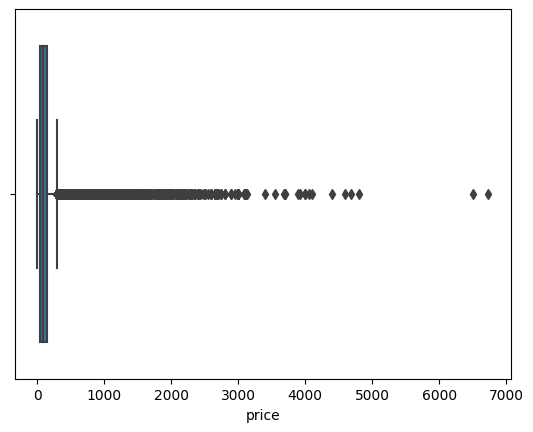

In [31]:
#Creating Boxplot to detect outlier for Price column
sns.boxplot(data = df, x ="price")

In [32]:
#Defining a function to removing outliers

def removing_outliers (df, column):
  df_filtered = df.copy()

  upper_quant = df[column].quantile(0.95)
  lower_quant = df[column].quantile(0.05)

  df_filtered = df[(df[column]< upper_quant) & (df[column]>lower_quant)]

  return df_filtered


In [33]:
#Generating new dataframe based on filtered 'price' column

df_cleaned = removing_outliers(df, "price")

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89375 entries, 0 to 118309
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        89375 non-null  object 
 1   product_cat     89375 non-null  object 
 2   price           89375 non-null  float64
 3   order_status    89375 non-null  object 
 4   customer_state  89375 non-null  object 
 5   review_score    89375 non-null  float64
dtypes: float64(2), object(4)
memory usage: 4.8+ MB


<Axes: xlabel='price'>

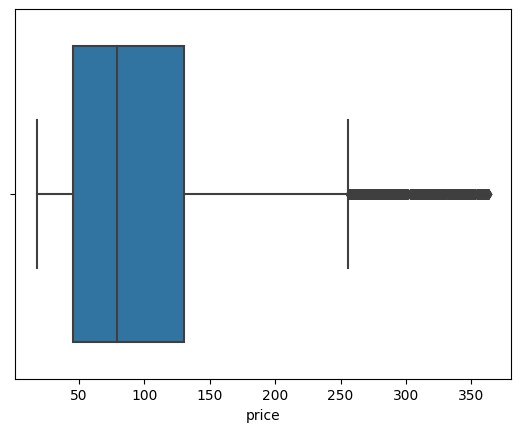

In [34]:
#Checking trough new boxplot

sns.boxplot(data = df_cleaned, x="price")

#Objectives 1: Looking for highest/lowest ordered product by category

In [41]:
# Define the product by grouping
cat_product = df_cleaned.groupby('product_cat')['order_id'].count().sort_values(ascending=False)

cat_product

product_cat
bed_bath_table               9444
health_beauty                7899
sports_leisure               7266
computers_accessories        6401
furniture_decor              6229
                             ... 
la_cuisine                     11
fashion_childrens_clothes       8
home_comfort_2                  4
security_and_services           2
computers                       1
Name: order_id, Length: 71, dtype: int64

<ipython-input-99-09c0b218e35c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('flare')


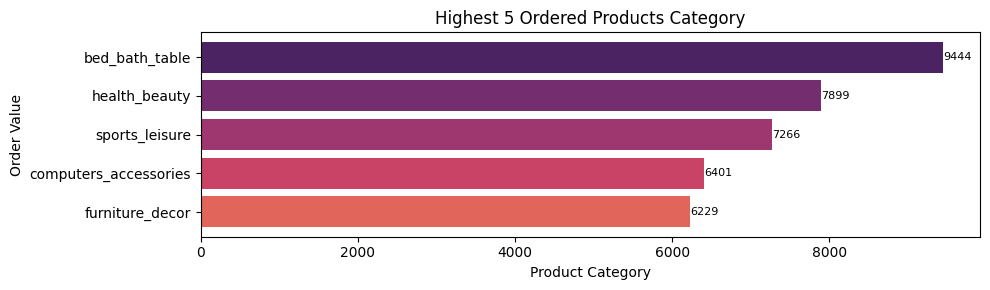

In [99]:
#Highest Ordered Product Category
# Defining numbers for highest ordered product category
highest_product_cat = cat_product.head(5).sort_values()

# Defining the colour map for color of the bars
cmap = plt.cm.get_cmap('flare')

# Creating a gradiant colour based on numbers for highest ordered product category
colors = np.linspace(0.3, 1, 5)

# Creating the bar plot
plt.figure(figsize=(10, 3)) #define the scale of the figure
bars = plt.barh(highest_product_cat.index,
                highest_product_cat.values,
                color=cmap(colors)) #creating the bars by assigning the defined value

# Annottating the value for each bar
for i, v in zip(highest_product_cat.index, highest_product_cat.values):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=8)

# Completing the figure labels
plt.xlabel('Product Category')
plt.ylabel('Order Value')
plt.title(f'Highest 5 Ordered Products Category')
plt.tight_layout()

# Displaying the bar plot
plt.show()

<ipython-input-102-e7e7c162d51f>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('flare')


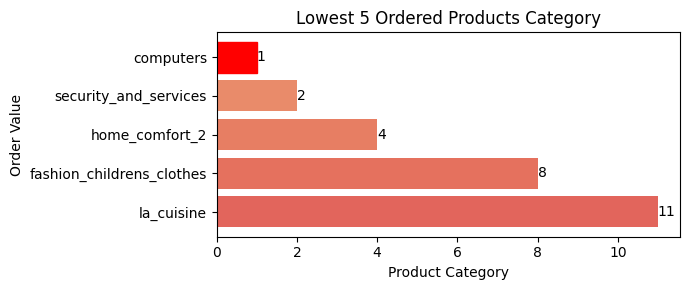

In [102]:
#Objecives 1: Highest and Lowest Ordered Product Categories

# Lowest Ordered Product Category
# Defining numbers for highest ordered product category
lowest_product_cat = cat_product.tail(5)

# Making a gradiant color
cmap = plt.cm.get_cmap('flare')
colors = np.linspace(0.3, 0.1, 5)

# Creating the bar plot
plt.figure(figsize=(7, 3)) #define the scale of the figure
bars = plt.barh(lowest_product_cat.index,
                lowest_product_cat.values,
                color=cmap(colors)) #creating the bars by assigning the defined value
bars[-1].set_color('r')

# Annottating the value for each bar
for i, v in zip(lowest_product_cat.index, lowest_product_cat.values):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=10)

# Completing the figure labels
plt.xlabel('Product Category')
plt.ylabel('Order Value')
plt.title(f'Lowest 5 Ordered Products Category')
plt.tight_layout()

# Displaying the bar plot
plt.show()

# **Objective 2: Highest and Lowest Revenue from Delivered Product**

In [43]:
# Calling for the ordered product with "delivered" order status

delivered_products = df_cleaned.loc[df_cleaned ['order_status'] == 'delivered']

delivered_products

,order_id,product_cat,price,order_status,customer_state,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.90,delivered,RJ,5.0
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,239.90,delivered,SP,4.0
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,199.00,delivered,MG,5.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,199.90,delivered,SP,5.0
5,00048cc3ae777c65dbb7d2a0634bc1ea,housewares,21.90,delivered,MG,4.0
...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,housewares,299.99,delivered,MA,5.0
118306,fffcd46ef2263f404302a634eb57f7eb,computers_accessories,350.00,delivered,PR,5.0
118307,fffce4705a9662cd70adb13d4a31832d,sports_leisure,99.90,delivered,SP,5.0
118308,fffe18544ffabc95dfada21779c9644f,computers_accessories,55.99,delivered,SP,5.0


In [44]:
#Sum up the price per cateogry product to calculate the revenue

net_revenue = delivered_products.groupby('product_cat')['price'].sum().sort_values(ascending = False)

# # net_revenue
pd.DataFrame(net_revenue)

,price
product_cat,
bed_bath_table,863340.03
health_beauty,779994.06
sports_leisure,700197.71
watches_gifts,631578.42
computers_accessories,607147.13
...,...
cds_dvds_musicals,640.00
fashion_childrens_clothes,519.95
home_comfort_2,424.87


<ipython-input-97-8deb681122eb>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('flare')


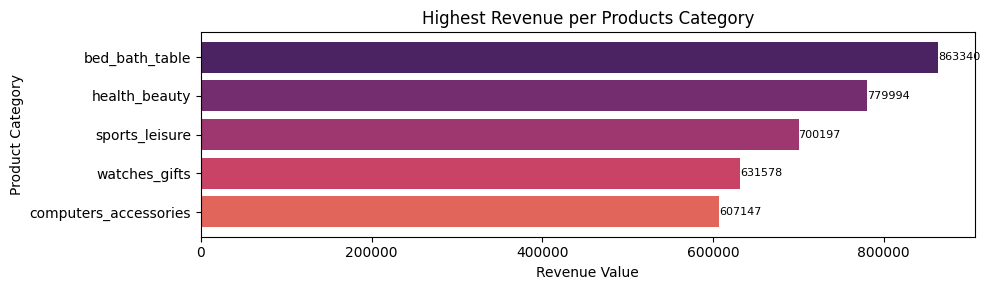

In [97]:
#Visualisizing the highets revenue per product category

# Defining numbers for highest revenue per product category
highest_rev =net_revenue.head(5).sort_values()

# Defining the colour map for color of the bars
cmap = plt.cm.get_cmap('flare')

# Creating a gradiant colour based on numbers for highest revenue per product category
colors = np.linspace(0.3, 1, 5)

# Creating the bar plot
plt.figure(figsize=(10, 3)) #define the scale of the figure
bars = plt.barh(highest_rev.index,
                highest_rev.values,
                color=cmap(colors)) #creating the bars by assigning the defined value

# Annottating the value for each bar
for i, v in zip(highest_rev.index, highest_rev.values):
    plt.text(v, i, int(v), ha= 'left', va='center', fontsize=8)

# Completing the figure labels
plt.xlabel('Revenue Value')
plt.ylabel('Product Category')
plt.title(f'Highest Revenue per Products Category')
plt.tight_layout()

# Displaying the bar plot
plt.show()

<ipython-input-103-97952ddf2a54>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('flare')


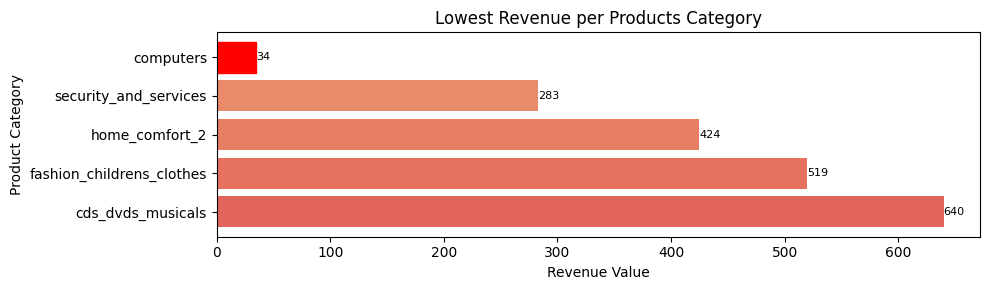

In [103]:
# Defining numbers for highest revenue per product category
highest_rev =net_revenue.tail(5)

# Making a gradiant color
cmap = plt.cm.get_cmap('flare')
colors = np.linspace(0.3, 0.1, 5)

# Creating the bar plot
plt.figure(figsize=(10, 3)) #define the scale of the figure
bars = plt.barh(highest_rev.index,
                highest_rev.values,
                color=cmap(colors)) #creating the bars by assigning the defined value
bars[-1].set_color('r') #distincts the lowest revenue

# Annottating the value for each bar
for i, v in zip(highest_rev.index, highest_rev.values):
    plt.text(v, i, int(v), ha= 'left', va='center', fontsize=8)

# Completing the figure labels
plt.xlabel('Revenue Value')
plt.ylabel('Product Category')
plt.title(f'Lowest Revenue per Products Category')
plt.tight_layout()

# Displaying the bar plot
plt.show()

# **Objective 3: Unavailable and Most Cancelled Product**

In [52]:
#Looking for most unavailable products:
unavailable_products = df_cleaned[df_cleaned['order_status']=='unavailable'].groupby('product_cat')['order_status'].count()

pd.DataFrame(unavailable_products) #previewing tha data
# unavailable_products.sum() > to sum up the count of the unavailable product

,order_status
product_cat,
auto,1
baby,2
cool_stuff,1
perfumery,2


In [55]:
#Looking for most cancelled product category
canceled_products = df_cleaned[df_cleaned['order_status']=='canceled'].groupby('product_cat')['order_status'].count().sort_values(ascending=False)

# pd.DataFrame(canceled_products) #previewing the data
# canceled_products.sum() > to sum up the count of cancelled product category

<ipython-input-80-e29ff46b2f70>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('flare')


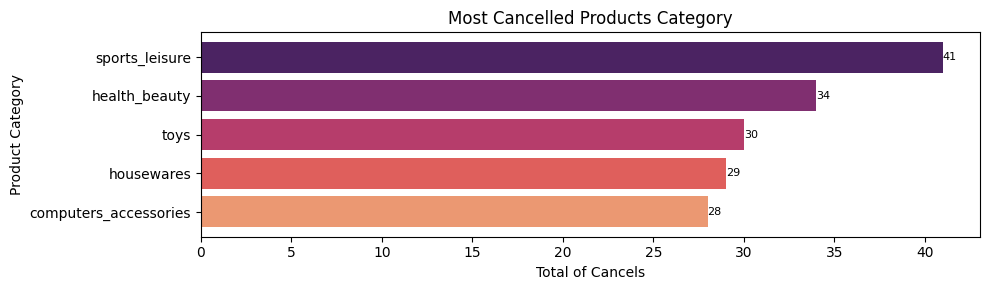

In [80]:
#Visualisizing the most cancelled product category

# Defining numbers for highest revenue per product category
highest_cancelled = canceled_products.head(5).sort_values()

# Defining the colour map for color of the bars
cmap = plt.cm.get_cmap('flare')

# Creating a gradiant colour
colors = np.linspace(0.1, 1, 5)

# Creating the bar plot
plt.figure(figsize=(10, 3)) #define the scale of the figure
bars = plt.barh(highest_cancelled.index,
                highest_cancelled.values,
                color=cmap(colors)) #creating the bars by assigning the defined value
# bars[-1].set_color('r') #distincts the higehst revenue

# Annottating the value for each bar
for i, v in zip(highest_cancelled.index, highest_cancelled.values):
    plt.text(v, i, int(v), ha= 'left', va='center', fontsize=8)

# Completing the figure labels
plt.xlabel('Total of Cancels')
plt.ylabel('Product Category')
plt.title(f'Most Cancelled Products Category')
plt.tight_layout()

# Displaying the bar plot
plt.show()

# **Objective 4: Most Loyal Customer**

In [57]:
# df_cleaned['customer_state'].unique()

cust_state = df_cleaned.groupby(['customer_state'])['order_id'].count().sort_values(ascending=False)

<ipython-input-78-06f3abe3977a>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Spectral')


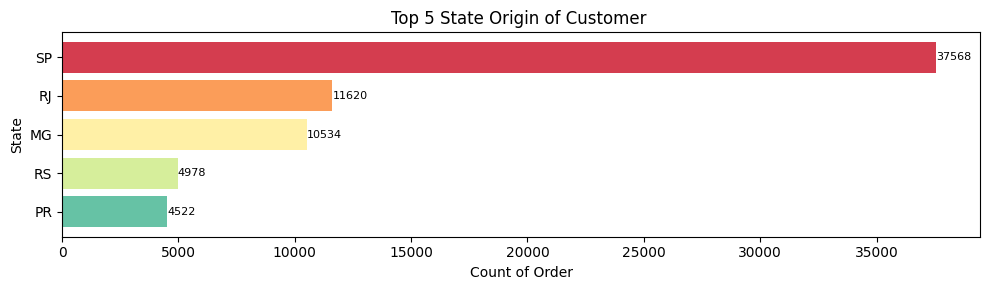

In [78]:
#Visualisizing the most loyal customer based on the state origin

# Defining numbers for state origin of customer
top_cust_state = cust_state.head(5).sort_values()

# Defining the colour map for color of the bars
cmap = plt.cm.get_cmap('Spectral')

# Creating a gradiant colour
colors = np.linspace(0.8, 0.1, 5)

# Creating the bar plot
plt.figure(figsize=(10, 3)) #define the scale of the figure
bars = plt.barh(top_cust_state.index,
                top_cust_state.values,
                color=cmap(colors)) #creating the bars by assigning the defined value
# bars[-1].set_color('c') #distincts the highest value

# Annottating the value for each bar
for i, v in zip(top_cust_state.index, top_cust_state.values):
    plt.text(v, i, int(v), ha= 'left', va='center', fontsize=8)


# Completing the figure labels
plt.xlabel('Count of Order')
plt.ylabel('State')
plt.title(f'Top 5 State Origin of Customer ')
plt.tight_layout()

# Displaying the bar plot
plt.show()

# Product Analysist on Specific Market (Sao Paolo Cases)

Review Score of Most Ordered Product

In [105]:
#Selecting the specific customer state Sao Paolo (SP)
sp_state_data = df_cleaned[df_cleaned['customer_state']=='SP']

#Grouping the product category
sp_prod  = sp_state_data.groupby('product_cat')['order_id'].count().sort_values(ascending=False).head(6)

sp_prod

product_cat
bed_bath_table           4435
health_beauty            3389
sports_leisure           3064
furniture_decor          2630
computers_accessories    2565
housewares               2517
Name: order_id, dtype: int64

<ipython-input-106-20abf35049d7>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('autumn')


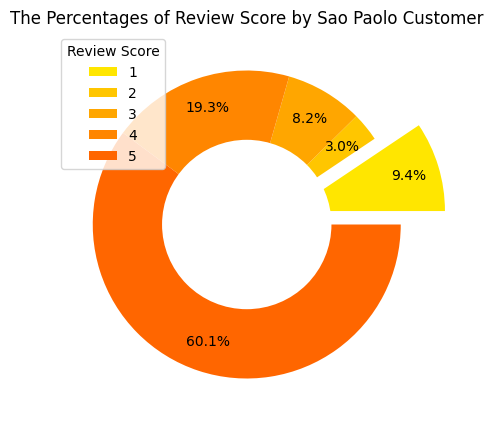

In [106]:
#Visualisizing the score review percentages

#Defining the rate of review score
rate = [1, 2, 3, 4, 5]

#Counting the review score per rate
sp_percentage_review = sp_state_data.groupby('review_score')['review_score'].count()

# Creating a gradiant colour
cmap = plt.cm.get_cmap('autumn')
colors_set = np.linspace(0.9, 0.4, 5)

#Separator
explode_set = (0.3, 0, 0, 0, 0)

#Creating a pie plot
fig, ax = plt.subplots(figsize=(5, 5)) #setting the fig/ax scale
ax.pie(sp_percentage_review,
        colors= cmap(colors_set),
        autopct="%.1f%%",
        pctdistance= 0.80,
        explode = explode_set)

#Adding a donut effect
center_pie = plt.Circle((0, 0), 0.55, fc= 'white')
fig.gca().add_artist(center_pie)

#Ncompleting the title and legen
plt.title("The Percentages of Review Score by Sao Paolo Customer")
plt.legend(rate,
           loc='upper left',
           title='Review Score')

#Showing the label
plt.show()

In [107]:
#Counting the review score greater than 3 for each product category
sp_good_review = sp_state_data[sp_state_data['review_score'] > 3].groupby('product_cat')['review_score'].count().sort_values(ascending=False)

#Top 6 good reviewed products
sp_good_review = pd.DataFrame(sp_good_review).head(6)

#Reset the index, rename the column, to join the dataframe
sp_good_review.reset_index(inplace=True)
sp_good_review.rename(columns ={'review_score':'good_review'}, inplace=True)

In [108]:
#counting the review score less and equals to 3 for each product category
sp_bad_review = sp_state_data[sp_state_data['review_score'] <= 3].groupby('product_cat')['review_score'].count().sort_values(ascending=False)

#Top 6 Bad Reviewed Product
sp_bad_review = pd.DataFrame(sp_bad_review).head(6)

#Reset the index and rename the column to merge the dataframe
sp_bad_review.reset_index(inplace=True)
sp_bad_review.rename(columns = {'review_score':'bad_review'}, inplace=True)


In [116]:
#Merging the two former dataframe
ratio_score_review = pd.merge(sp_bad_review, sp_good_review, on='product_cat').sort_values('good_review')

# Adding the percentagesof bad review
col = []
for x, y in zip(ratio_score_review['bad_review'], ratio_score_review['good_review']):
  z = f'{round(x/(x+y) *100, 1)}%'
  col.append(z)

ratio_score_review['ratio_bad_score'] = col

# Preview the dataframe
ratio_score_review.sort_values('ratio_bad_score', ascending=False)

,product_cat,bad_review,good_review,ratio_bad_score
0,bed_bath_table,1081,3354,24.4%
2,computers_accessories,607,1958,23.7%
3,furniture_decor,596,2034,22.7%
4,sports_leisure,587,2477,19.2%
5,housewares,473,2044,18.8%
1,health_beauty,623,2766,18.4%


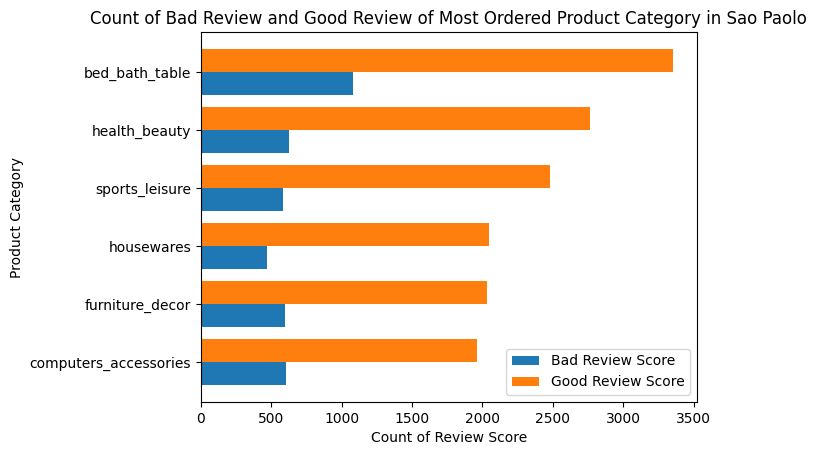

In [115]:
#Creating the grouped bar comparing the good review and bad review of each most ordered product

#define the number of needed grouped bar
x = np.arange(len(ratio_score_review['product_cat']))

#setting the width of grouped bar
width = 0.40

#setting the grouped bar
plt.barh(x-width/2, ratio_score_review['bad_review'].values, width, label= 'Bad Review Score')
plt.barh(x+width/2, ratio_score_review['good_review'].values, width, label= 'Good Review Score')

#assigning the label on y axis
plt.yticks(x, ratio_score_review['product_cat'].values)

#completing the label
plt.xlabel('Count of Review Score')
plt.ylabel('Product Category')
plt.title('Count of Bad Review and Good Review of Most Ordered Product Category in Sao Paolo')
plt.legend()

#showing the label
plt.show()


# **ANALISIS**

1. Bed Bath Table merupakan kategori produk yang memiliki pesanana terbesar di Olyst Marketplace sebesar 11.268 pesanan, mengungguli jauh produk-produk di bawahnya dengan margin hampir 3.000 pesanan. Sementara itu, computers menjadi kategori produk dengan pesanan terkecil hanya 1 pesanan. 4 kategori lain juga mencatatkan jumlah pesanan yang sangat kecil di bawah 15 pesanan. Dari hasil ini, maka optimisasi penjualan dapat dilakukan dengan menutup penjualan pada jenis-jenis produk dengan pesanan yang minim.

2. Berdasarkan jumlah pesanan yang berhasil diterima oleh customer, maka penjualan bersih terbesar direpresentasikan pula oleh kategori Bed Bath Table dengan angka sekitar 998.785. Sementara itu, revenue terkecil juga mdirepresentasikan dengan jumlah pesanan terkecil yang sama, setidaknya 3 urutan terbawah dengan value penjualan kurang dari 500.

3. Sejauh ini, penjualan barang di Olist Marketplace secara keseluruhan sudah baik dalam hal ketersediaan stok karena hany ada 6 produk dengan status tidak tersedia, yakni masing-masing 1 dari kategori Auto dan kategori Cool Stuff, dan masing-masing 2 dari kategori Baby dan Perfumery

4. Kategori produk yang sering dibatalkan oleh consumer adalah kategori Hosewares sebanyak 48 order, diikuti oleh Sport Leisure sebanyak 46 order. Kuantitas pembatasaln produk tidak terlalu signifikan.

5. Customer terbesar berasal dari Sao Paolo (SP) dengan lebih dari 43.000 order. Jumlah yang sangat signifikan dibanding kota lain. Urutan kedua Rio de Janeiro bahkan hanya memiliki 13.000 an order. Maka, optimisasi penjualan dapat dilakukan dengan marketing dan insentifikasi yang besar di wilayah ini.

6. Kategori Produk yang paling besar dipesan oleh Customer dari Sao Paolo juga cukup representatif dengan kategori produks dipesan paling banyak secara general.

7. Meski secara umum penilaian customer baik, penilaian dengan skor 1 juga cukup tinggi dengan 10% lebih, bahkan lebih besar daripada skor 2 dan skor 3.

8. Jika penilain review dikategorikan menjadi Good Review dan Bad Review, maka 5 kategori produk tertinggi memiliki rasio Bad Review yang cukup besar (antara 19-26%). Maka perlu upaya untuk mempertahankan kualitas kategori produk hingga ke tangan customer.